# Problem Statement:
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

Time of purchase patterns (making sure last-minute purchases are expensive)

Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

# Importing necessary Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("Flight price Dataset.csv")
df

Unnamed: 0   Airline     Source Destination Dep_Time Arrival_Time  \
0             0    IndiGo  New Delhi      Mumbai    06:20        10:55   
1             1    IndiGo  New Delhi      Mumbai    05:00        10:55   
2             2    IndiGo  New Delhi      Mumbai    05:00        10:05   
3             3  Go First  New Delhi      Mumbai    06:00        10:15   
4             4  Go First  New Delhi      Mumbai    17:30        21:25   
..          ...       ...        ...         ...      ...          ...   
553         553  Air Asia    Kolkata        Pune    08:30        14:10   
554         554  Air Asia    Kolkata        Pune    16:00        22:35   
555         555  Air Asia    Kolkata        Pune    14:05        22:35   
556         556  Air Asia    Kolkata        Pune    05:25        17:05   
557         557  Air Asia    Kolkata        Pune    08:30        22:35   

    Duration Total_Stops Additional_Info Price (in ₹)  
0     4h 35m      1 Stop         No info        4,293  
1     5h 55m      1 Stop         No info        4,293  
2     5h 05m      1 Stop             NaN        4,441  
3     4h 15m      1 Stop         No info        4,805  
4     3h 55m      1 Stop             NaN        4,950  
..       ...         ...             ...          ...  
553   5h 40m      1 Stop    No Meal Fare        7,110  
554   6h 35m      1 Stop         No info        7,110  
555   8h 30m      1 Stop         No info        7,110  
556  11h 40m      1 Stop         No info        7,110  
557  14h 05m      1 Stop         No info        7,110  

[558 rows x 10 columns]

Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 1918 rows and 10 columns present in our dataframe. In the above cell we can see our dataset includes a target label "Price" column and the remaining feature columns can be used to determine or help in predicting the price of the flights for different places. Since price is a continous value it makes this to be a Regression problem!

# Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction.

In [5]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(10)

We have 558 Rows and 9 Columns in our dataframe


Airline     Source Destination Dep_Time Arrival_Time Duration Total_Stops  \
0    IndiGo  New Delhi      Mumbai    06:20        10:55   4h 35m      1 Stop   
1    IndiGo  New Delhi      Mumbai    05:00        10:55   5h 55m      1 Stop   
2    IndiGo  New Delhi      Mumbai    05:00        10:05   5h 05m      1 Stop   
3  Go First  New Delhi      Mumbai    06:00        10:15   4h 15m      1 Stop   
4  Go First  New Delhi      Mumbai    17:30        21:25   3h 55m      1 Stop   
5  Go First  New Delhi      Mumbai    06:00        16:15  10h 15m      1 Stop   
6  Air Asia  New Delhi   Bangalore    09:30        12:15   2h 45m    Non Stop   
7    IndiGo  New Delhi   Bangalore    17:25        19:55   2h 30m    Non Stop   
8    IndiGo  New Delhi   Bangalore    13:00        15:35   2h 35m    Non Stop   
9    IndiGo  New Delhi   Bangalore    08:20        11:00   2h 40m    Non Stop   

  Additional_Info Price (in ₹)  
0         No info        4,293  
1         No info        4,293  
2             NaN        4,441  
3         No info        4,805  
4             NaN        4,950  
5             NaN        4,950  
6         No info        5,235  
7             NaN        5,237  
8         No info        5,237  
9         No info        5,237

Column Description:

-Airline : This shows the list of all the Airline Names for which the data got scraped

-Source : Gives us the name of the source place where the flight journey began

-Destination : Shows us the name of the destination place where the flight journey ended

-Dep_Time : In this column we have the timings of every flight departure

-Arrival_Time : Here in this column we have the timings of every flight arrival

-Duration : We can see the total duration of a flight that it took to fly from the source to the destination

-Total_Stops : Lists the number of stops the flight is going to take to complete the entire journey

-Additional_Info : Provides us with any additional information like type of meal that the passenger is eligible for

-Price : Finally we have our label column that has the ticket prices for the aircraft journey

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price (in ₹)'],
      dtype='object')


In [7]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Total_Stops                  3
Additional_Info              3
Source                       5
Airline                      7
Destination                 18
Duration                    97
Price (in ₹)               171
Arrival_Time               185
Dep_Time                   194

With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns of our dataset.

In [8]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          558 non-null    object
 1   Source           558 non-null    object
 2   Destination      558 non-null    object
 3   Dep_Time         558 non-null    object
 4   Arrival_Time     558 non-null    object
 5   Duration         558 non-null    object
 6   Total_Stops      558 non-null    object
 7   Additional_Info  468 non-null    object
 8   Price (in ₹)     558 non-null    object
dtypes: object(9)
memory usage: 39.4+ KB


The above dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [9]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('-'*80)

IndiGo          255
Air Asia         81
Go First         65
Vistara          54
Air India        48
SpiceJet         44
Alliance Air     11
Name: Airline, dtype: int64
--------------------------------------------------------------------------------
New Delhi    254
Bangalore    119
Mumbai        92
Hyderabad     84
Kolkata        9
Name: Source, dtype: int64
--------------------------------------------------------------------------------
Bangalore        58
Kolkata          57
Hyderabad        53
Goa              50
Mumbai           38
Pune             37
Chennai          37
New Delhi        35
Ahmedabad        34
Srinagar         34
Patna            26
Kochi            24
Jaipur           19
Visakhapatnam    15
Guwahati         13
Chandigarh       12
Varanasi          8
Tirupati          8
Name: Destination, dtype: int64
--------------------------------------------------------------------------------
07:00    11
05:45    10
09:30    10
05:00    10
06:20     9
         ..
13:05     1
1

Column 'Additional_info' having data related to meal availibility, so let's rename this column.

In [10]:
df.rename(columns = {"Additional_Info": "Meal_Availability"},inplace = True)

In [11]:
df.rename(columns={df.columns[8]:'Price'}, inplace=True) #Renaming the Price column to remove the Rupees symbol

In [12]:
# Checking for null values
df.isnull().sum()

Airline               0
Source                0
Destination           0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Meal_Availability    90
Price                 0
dtype: int64

We can see some null values on 'Meal_Availability' column, let's fill the null values with mode method as this is a catagorical column.

In [13]:
df["Meal_Availability"] = df["Meal_Availability"].fillna(df["Meal_Availability"].mode()[0])

In [14]:
# Checking for null values after imputing
df.isnull().sum()

Airline              0
Source               0
Destination          0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Meal_Availability    0
Price                0
dtype: int64

<AxesSubplot:>

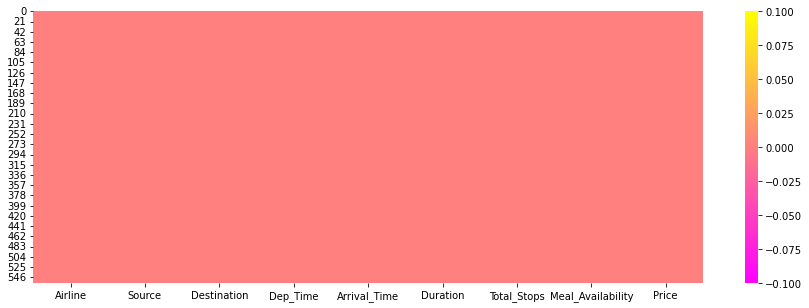

In [15]:
# Let's visualize the null values clearly through Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="spring")

# Total_Stops

In [16]:
# Total_Stops

df.Total_Stops.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2}, 
                           inplace = True)
df["Total_Stops"].value_counts()

0    408
1    149
2      1
Name: Total_Stops, dtype: int64

Now we are changing the object datatype "Total_Stops" column to integer values by giving them the numeric stops values instead of a descriptive one.

In [17]:
# Converting columns from object type to Datetime Type
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

# Duration

In [18]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

# Departure_time
Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [19]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
df["Departure_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [20]:
# Dropping Departure_time column
df.drop("Dep_Time",axis=1,inplace=True)

# Arrival_Time
Similarly we can extract hours and minutes from Arrival_Time column and dropping Arrival_Time column.

In [21]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time column
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

# Price
The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [22]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

In [23]:
# Checking dataset again
df

Airline     Source Destination   Duration  Total_Stops  \
0      IndiGo  New Delhi      Mumbai   4.583333            1   
1      IndiGo  New Delhi      Mumbai   5.916667            1   
2      IndiGo  New Delhi      Mumbai   5.083333            1   
3    Go First  New Delhi      Mumbai   4.250000            1   
4    Go First  New Delhi      Mumbai   3.916667            1   
..        ...        ...         ...        ...          ...   
553  Air Asia    Kolkata        Pune   5.666667            1   
554  Air Asia    Kolkata        Pune   6.583333            1   
555  Air Asia    Kolkata        Pune   8.500000            1   
556  Air Asia    Kolkata        Pune  11.666667            1   
557  Air Asia    Kolkata        Pune  14.083333            1   

    Meal_Availability   Price  Departure_Hour  Departure_Min  Arrival_Hour  \
0             No info  4293.0               6             20            10   
1             No info  4293.0               5              0            10   
2             No info  4441.0               5              0            10   
3             No info  4805.0               6              0            10   
4             No info  4950.0              17             30            21   
..                ...     ...             ...            ...           ...   
553      No Meal Fare  7110.0               8             30            14   
554           No info  7110.0              16              0            22   
555           No info  7110.0              14              5            22   
556           No info  7110.0               5             25            17   
557           No info  7110.0               8             30            22   

     Arrival_Min  
0             55  
1             55  
2              5  
3             15  
4             25  
..           ...  
553           10  
554           35  
555           35  
556            5  
557           35  

[558 rows x 11 columns]

In [24]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Source                object
Destination           object
Duration             float64
Total_Stops            int64
Meal_Availability     object
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

In [25]:
# Statistical summary of dataset
df.describe()

Duration  Total_Stops        Price  Departure_Hour  Departure_Min  \
count  558.000000   558.000000   558.000000      558.000000     558.000000   
mean     3.464456     0.270609  4974.465950       11.641577      26.577061   
std      2.970906     0.448692  1477.658651        5.579894      17.804150   
min      1.000000     0.000000  1743.000000        0.000000       0.000000   
25%      1.583333     0.000000  3694.000000        7.000000      10.000000   
50%      2.250000     0.000000  5206.500000       11.000000      25.000000   
75%      3.916667     1.000000  5996.000000       16.000000      40.000000   
max     17.250000     2.000000  8043.000000       22.000000      55.000000   

       Arrival_Hour  Arrival_Min  
count    558.000000   558.000000  
mean      15.078853    28.207885  
std        5.524961    17.240400  
min        2.000000     0.000000  
25%       10.000000    15.000000  
50%       16.000000    25.000000  
75%       20.000000    45.000000  
max       23.000000    55.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

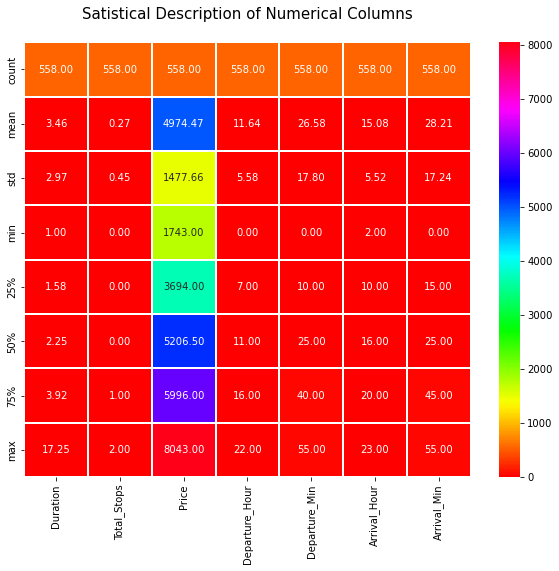

In [26]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hsv")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

In [27]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_Availability']

Numerical columns present in the dataset are:
 ['Duration', 'Total_Stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


# Data Visualization

In [29]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=78b2f58711f796a03ff234048e25dbaac593aaa12a0baad55ce11f4e87f77361
  Stored in directory: c:\users\anandraj\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [30]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

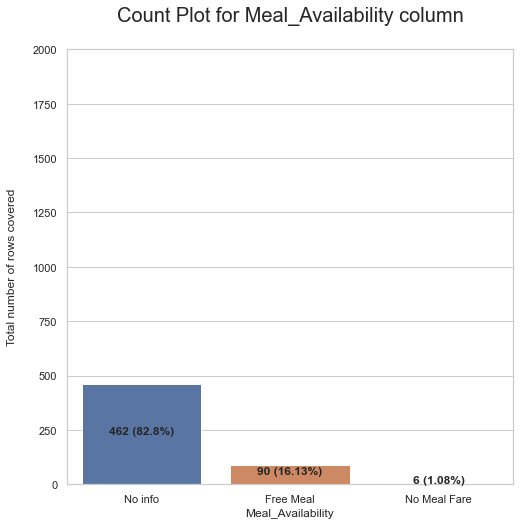

In [31]:
sns.set(style="whitegrid")

try:
    x = 'Meal_Availability'
    k=0
    plt.figure(figsize=[8,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From above plot we can see 82.8% cases there is no info of meal, so we can say free meal will not be provided.

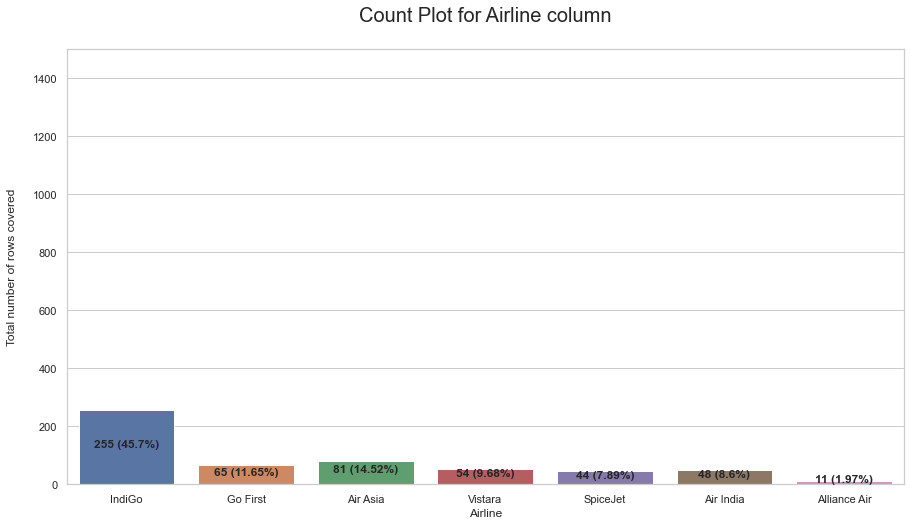

In [32]:
try:
    x = 'Airline'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,1500)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Highest number of airline preferred by people are Indigo covering 49.48% of the total record. Air Asia, Go First and Vistara and similar in range. FlyBig has the lowest numbers.

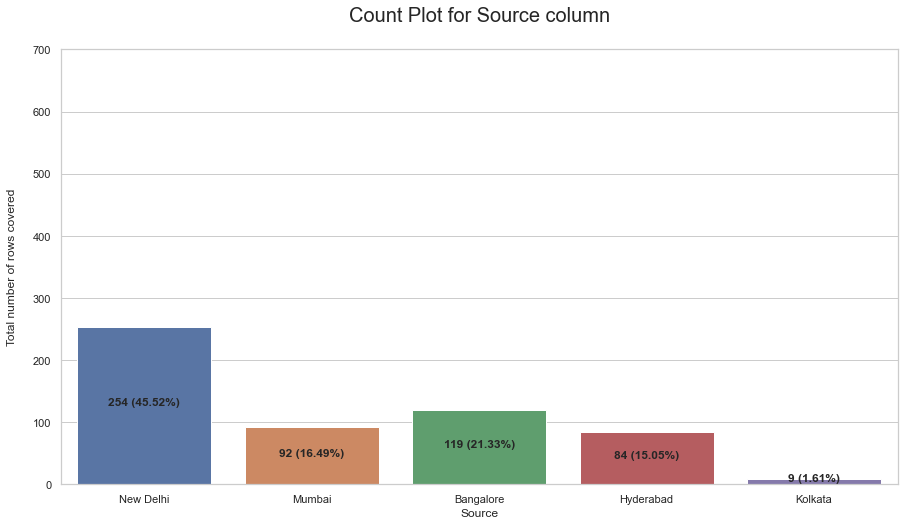

In [33]:
try:
    x = 'Source'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,700)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

The departure area or source place highly used or people majorly flying from the city is "New Delhi" covering 31.91% record in the column

We see that "Mumbai" is a close second wherein it covers 21.85% records in the column

Other two famous locations where people chose to fly from are "Bangalore", "Hyderabad" and "Kolkata"

The least travel from location is "Chennai"

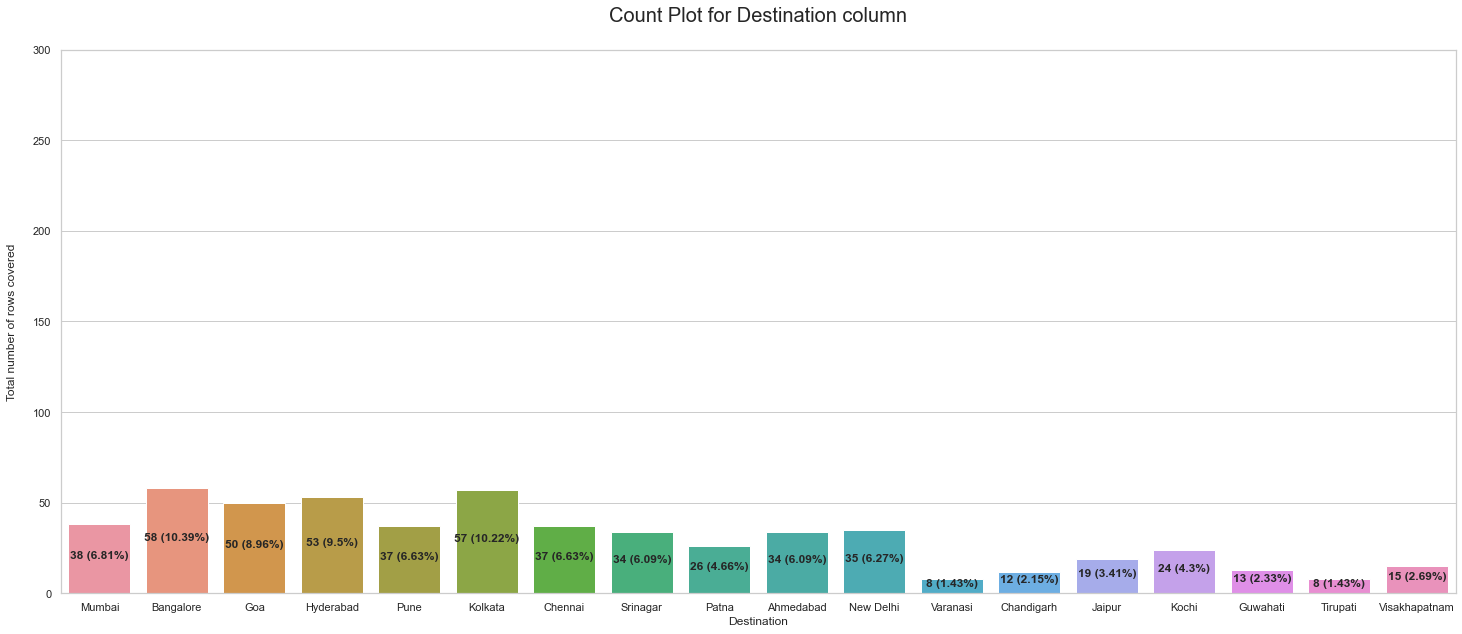

In [34]:
try:
    x = 'Destination'
    k=0
    plt.figure(figsize=[25,10])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,300)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Banglore and kolkata have the highest number of flights

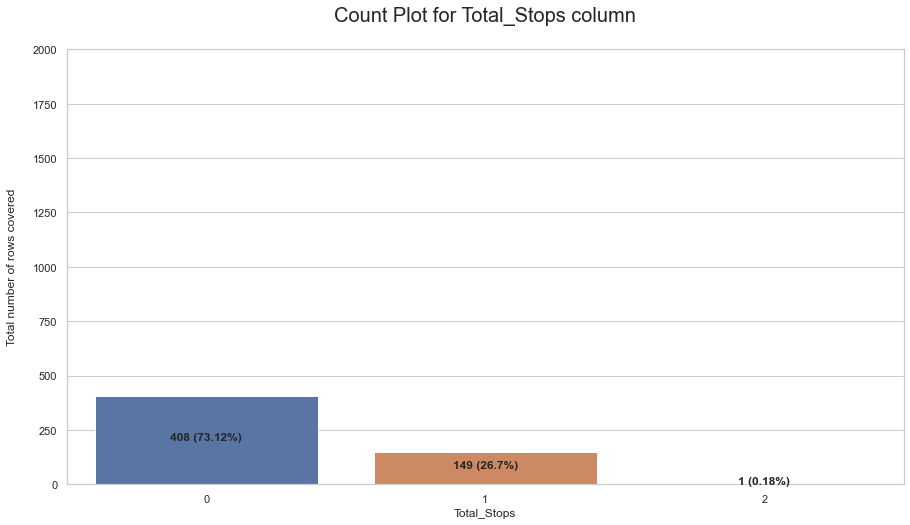

In [35]:
try:
    x = 'Total_Stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Majority of the cases, evey one flies with direct flight and followed by 1 stop flight. No one prefers flight with more than 1 stop.

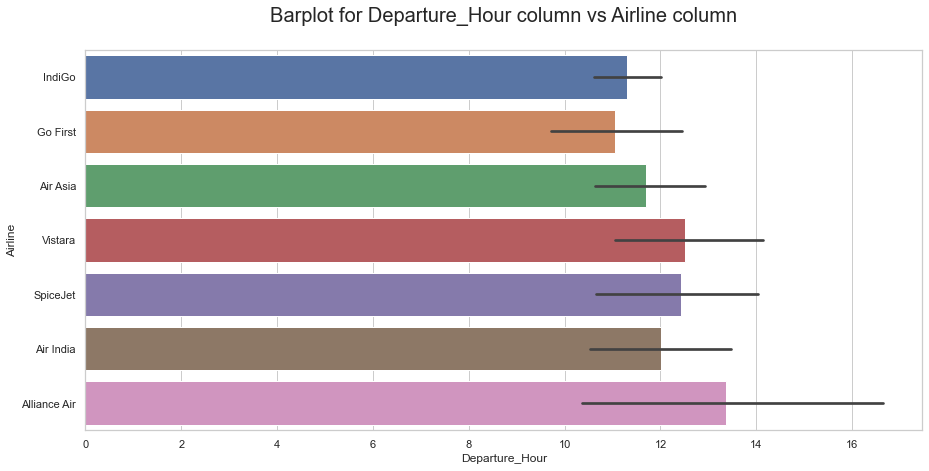

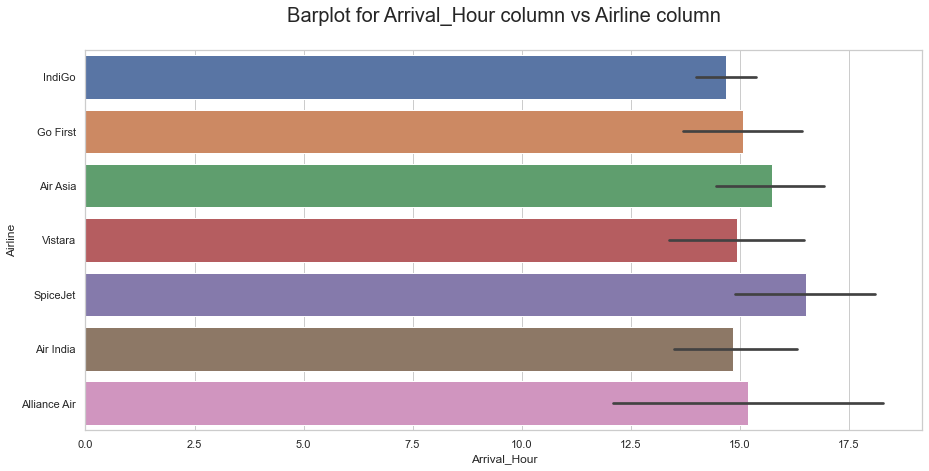

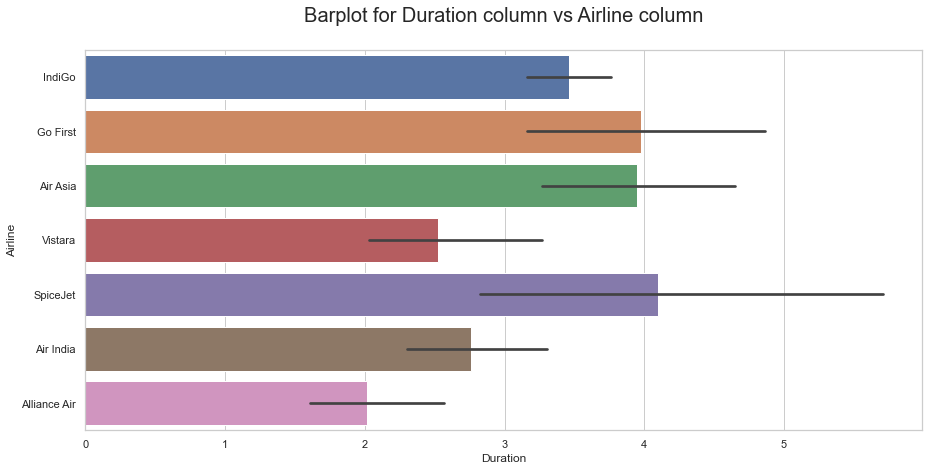

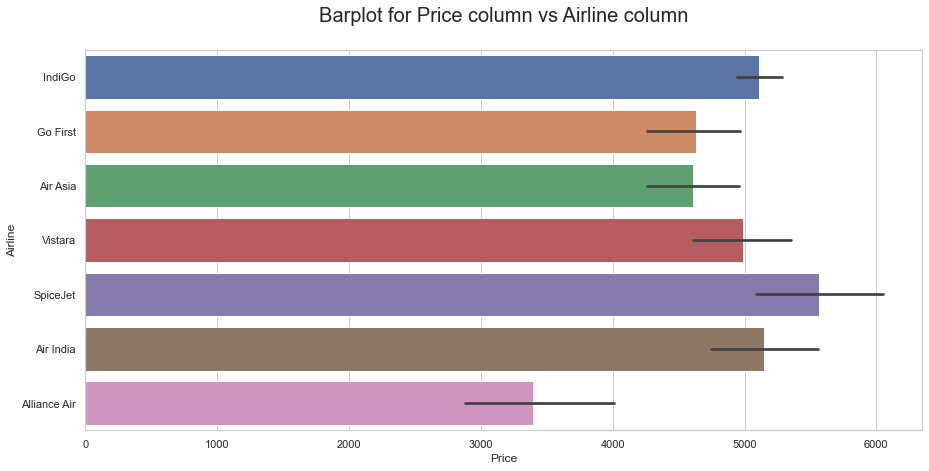

In [36]:
y = 'Airline'

x = 'Departure_Hour'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Arrival_Hour'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Duration'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

When we observe the barplot for Departure hour vs Airline we can see that FlyBig has the highest departure time while IndiGo has the lowest departure time

Considering the barplot for Arrival time vs Airline we can see that FlyBig has the highest arrival time while Vistara have the lowest arrival time

Taking a look at the barplot for Flight duration vs Airline we observe that Ai Asia has the highest flight duration while Alliance Air has the lowest flight duration collectively

Comparing the barplots for Flight prices vs Airline we can clearly see that Vistara have very high flight prices while the FlyBig has the lowest fare

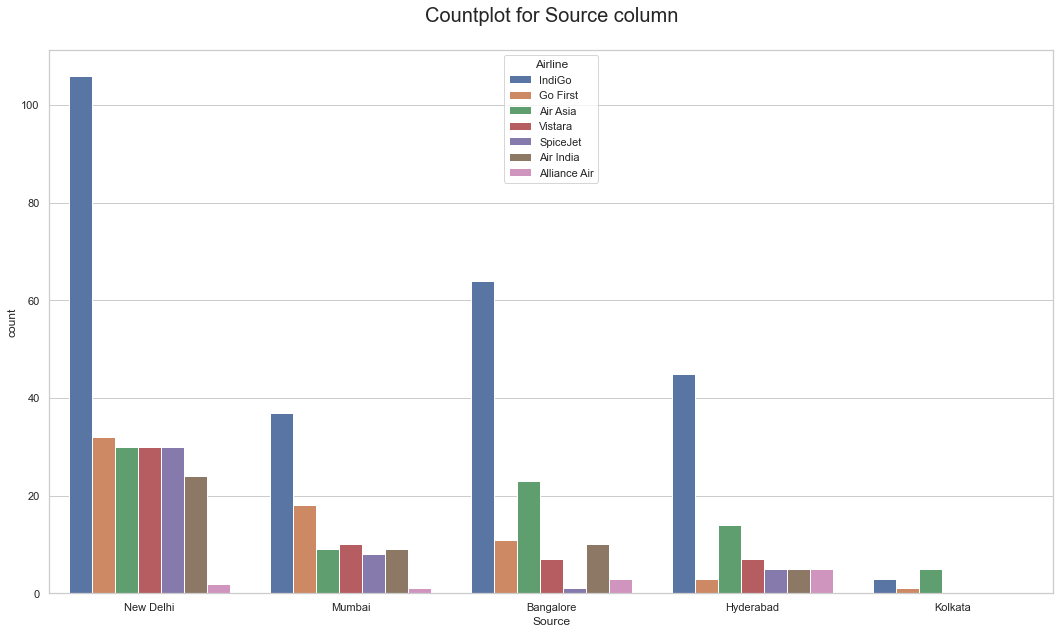

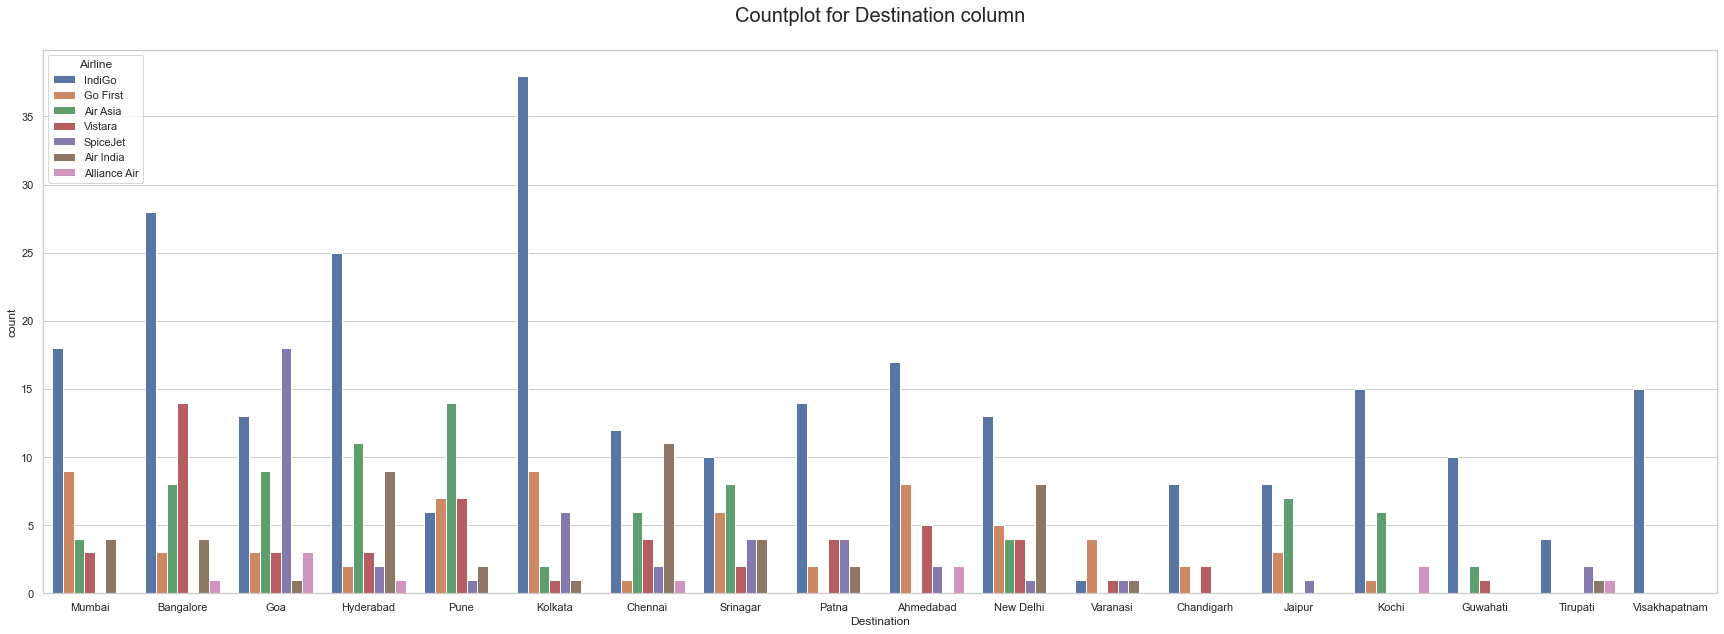

In [37]:
x = "Source"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "Destination"
plt.figure(figsize=(30,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

Checking out the Source place details for each and every airline we can see that Mumbai city has the highest number of departure flights for Indigo airlines

Looking at the Destination place details for each and every airline we can see that Chennai city has the highest number of arrival flights for Indigo airlines

Overall I can notice that Indigo flights do quite well and can be used for arrival and departure to and from any location in India

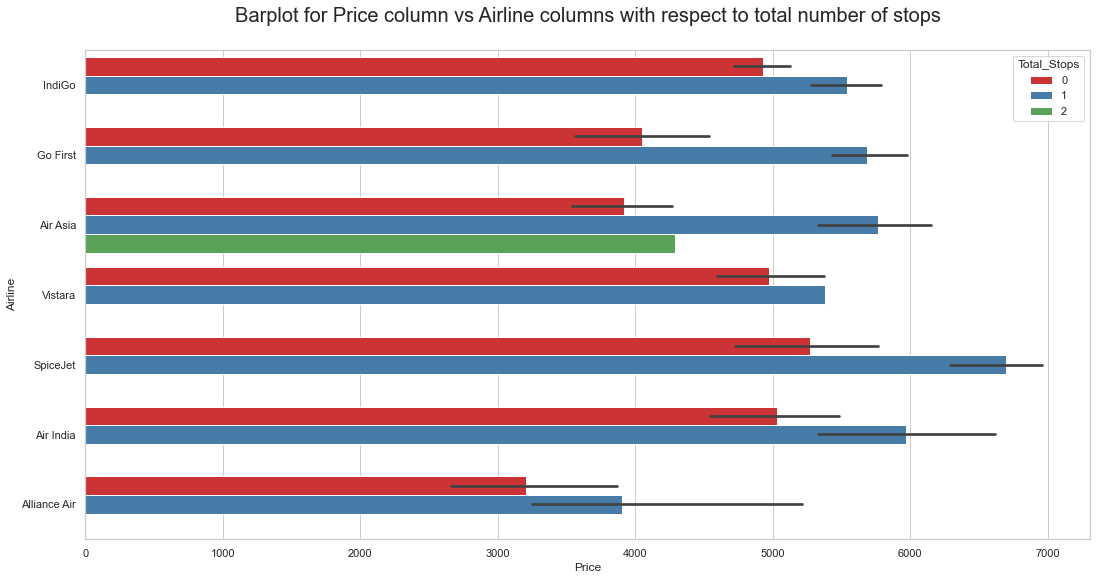

In [38]:
x = "Price"
y = "Airline"

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Total_Stops'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

Spicejet has the maximum non stop flight

Air India has the maximum no of 1 stop flights

Air Asia has the maxiumum no of 2 stop flights 

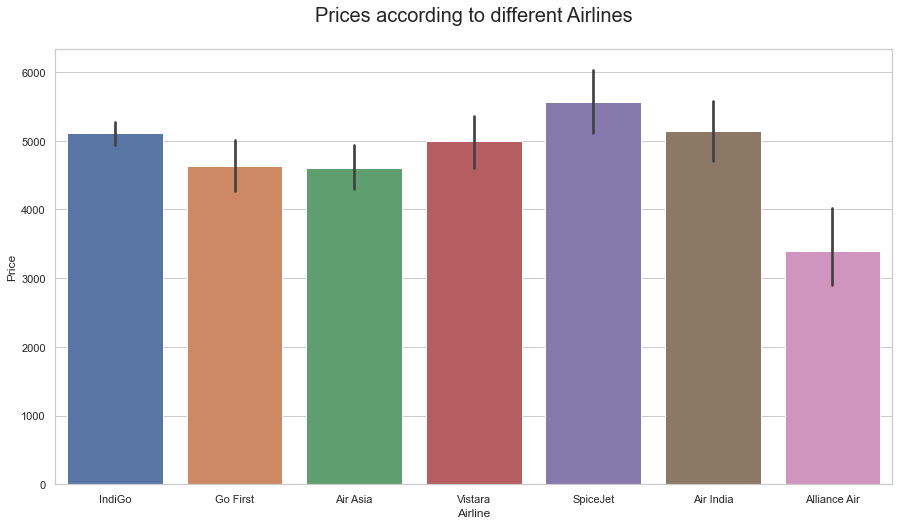

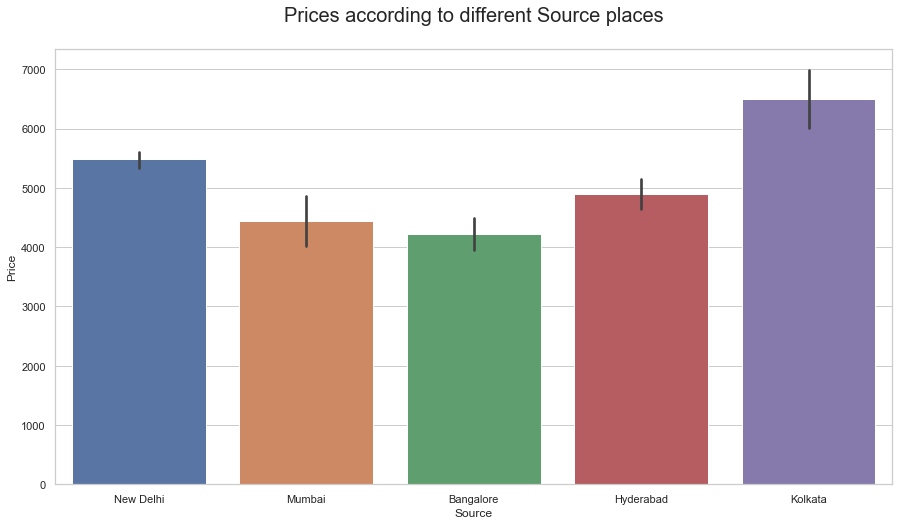

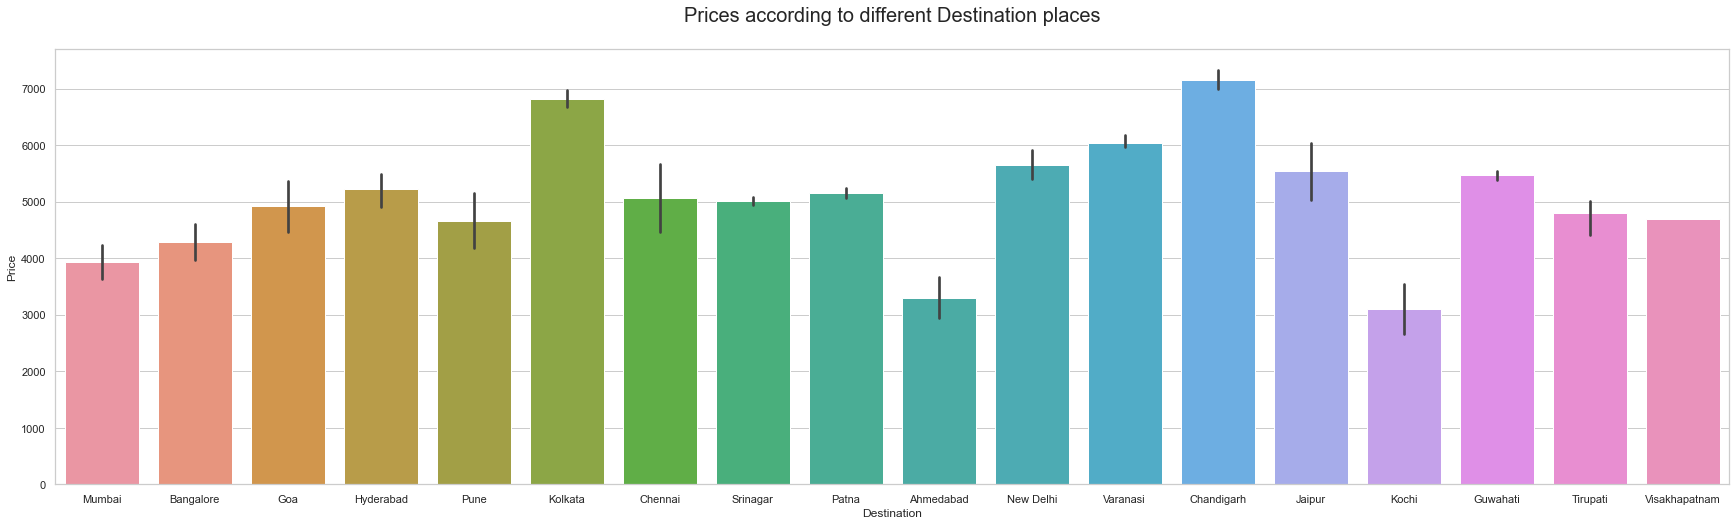

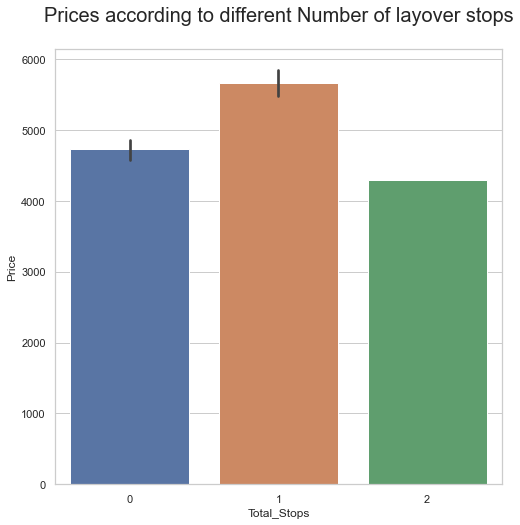

In [39]:
y = "Price"

x = "Airline"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "Source"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "Destination"
plt.figure(figsize = (30,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Total_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

Airfares in Vistara and Air India are pretty high when compared to other airlines

Flight prices when departing from cities like Chennai and Patna have higher price range but the others are around the similar range a bit lesser in pricing but not providing a huge difference as such

Similarly prices when arriving in cities Portblair and Dheradun have high price range

When we consider the layovers for pricing situtation then obviously direct flights are cheaper when compared to flights that have 1 or more stops

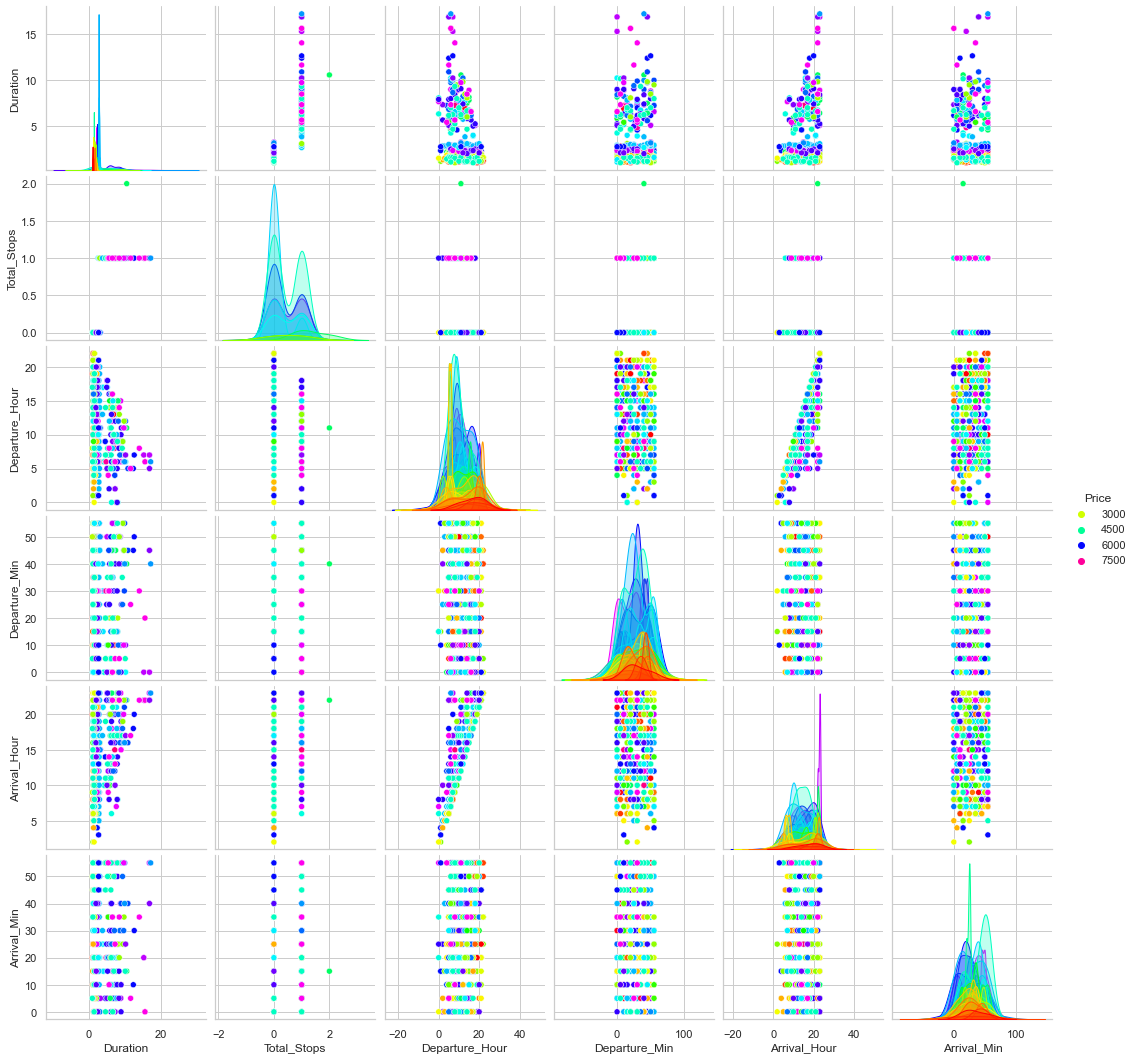

In [40]:
sns.pairplot(df,hue="Price",palette="hsv")
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.

Here we can observe the correaltion between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.

# Outliers

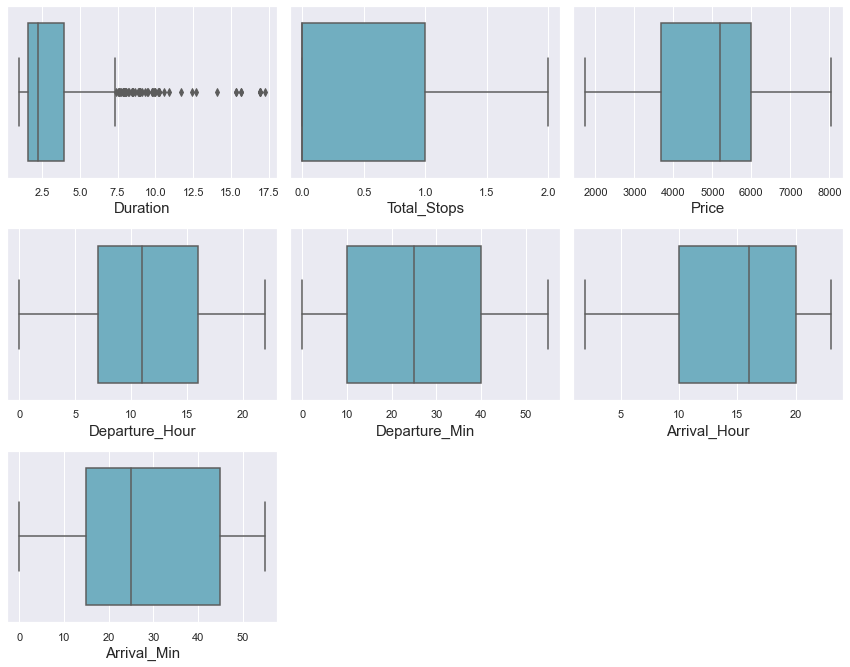

In [41]:
# Identifying the outliers using boxplot
sns.set(style="darkgrid")

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="c")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can see that columns "Duration" have some outliers, let's remove the outliers through zscore method

We can ignore the outliers present in Price column as this is our target column

In [42]:
# Features containing outliers
df1= df[['Duration']]

In [43]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df1=df[(z<3).all(axis=1)]

In [44]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", df.shape)
print("Shape of train dataset after removing outliers:", new_df1.shape)

Shape of train dataset before removing outliers: (558, 11)
Shape of train dataset after removing outliers: (546, 11)


In [45]:
# Let's check the the data loss
data_loss = (1918-1892)/1918*100
data_loss

1.3555787278415017

Now we have removed the outliers.

In [46]:
df=new_df1.copy() # Reassigning the changed dataframe name to our original dataframe name

# Skewness

In [47]:
# Checking the skewness
df.skew()

Duration          1.520653
Total_Stops       1.194474
Price            -0.276019
Departure_Hour    0.116375
Departure_Min     0.009357
Arrival_Hour     -0.148556
Arrival_Min       0.017070
dtype: float64

We can find the skewness in Duration and Total_Stops column, Let's remove skewness of Duration column only

# Removing skewness using yeo-johnson method

In [48]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ['Duration']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [49]:
df[skew1] = scaler.fit_transform(df[skew1].values)
df[skew1].head()

Duration
0  1.072454
1  1.353172
2  1.193716
3  0.977291
4  0.867736

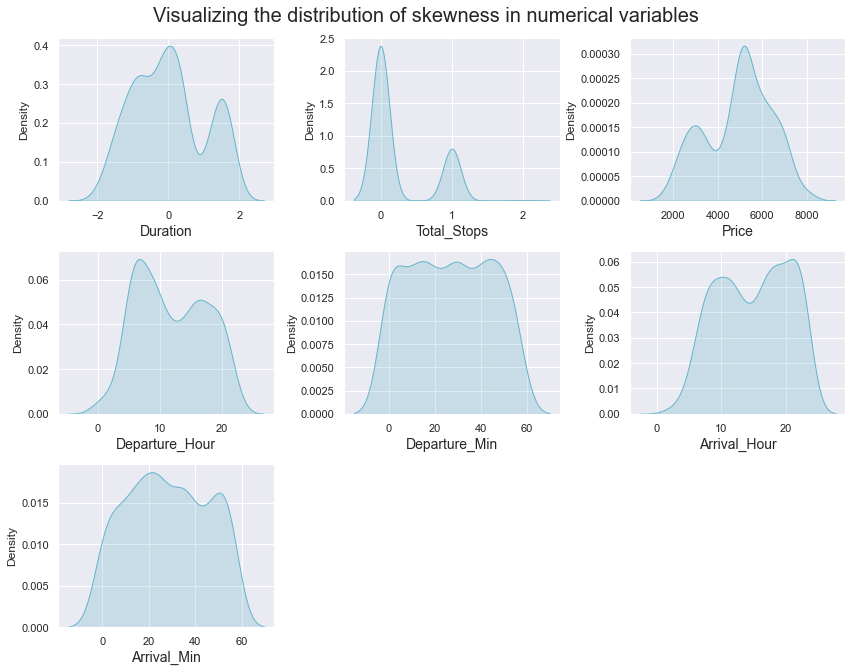

In [50]:
# Checking how the data has been distriubted 
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="c", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Encoding the categorical columns using Label Encoder Method

In [51]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [52]:
# Displaying the categorical columns after encoding 
df[categorical_col].head()

Airline  Source  Destination  Meal_Availability
0        4       4           10                  2
1        4       4           10                  2
2        4       4           10                  2
3        3       4           10                  2
4        3       4           10                  2

# Correlation

In [53]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Airline    Source  Destination  Duration  Total_Stops  \
Airline            1.000000  0.106269    -0.048200 -0.042822    -0.137414   
Source             0.106269  1.000000    -0.145411  0.013785    -0.152287   
Destination       -0.048200 -0.145411     1.000000 -0.004223     0.113772   
Duration          -0.042822  0.013785    -0.004223  1.000000     0.812843   
Total_Stops       -0.137414 -0.152287     0.113772  0.812843     1.000000   
Meal_Availability  0.053789 -0.054642     0.062895  0.072177     0.049677   
Price              0.114865  0.280277     0.161086  0.526379     0.244747   
Departure_Hour     0.018891  0.022818    -0.115683 -0.230490    -0.233984   
Departure_Min     -0.013290  0.060343     0.043760 -0.061481    -0.056399   
Arrival_Hour      -0.037144 -0.039268    -0.100910  0.157717     0.150607   
Arrival_Min        0.167176  0.003203     0.032613 -0.087270    -0.094675   

                   Meal_Availability     Price  Departure_Hour  Departure_Min  \
Airline                     0.053789  0.114865        0.018891      -0.013290   
Source                     -0.054642  0.280277        0.022818       0.060343   
Destination                 0.062895  0.161086       -0.115683       0.043760   
Duration                    0.072177  0.526379       -0.230490      -0.061481   
Total_Stops                 0.049677  0.244747       -0.233984      -0.056399   
Meal_Availability           1.000000  0.065281       -0.069321      -0.046896   
Price                       0.065281  1.000000       -0.132531      -0.023955   
Departure_Hour             -0.069321 -0.132531        1.000000      -0.018618   
Departure_Min              -0.046896 -0.023955       -0.018618       1.000000   
Arrival_Hour               -0.039843  0.022268        0.903462       0.012041   
Arrival_Min                -0.026905 -0.019205        0.078172      -0.017456   

                   Arrival_Hour  Arrival_Min  
Airline               -0.037144     0.167176  
Source                -0.039268     0.003203  
Destination           -0.100910     0.032613  
Duration               0.157717    -0.087270  
Total_Stops            0.150607    -0.094675  
Meal_Availability     -0.039843    -0.026905  
Price                  0.022268    -0.019205  
Departure_Hour         0.903462     0.078172  
Departure_Min          0.012041    -0.017456  
Arrival_Hour           1.000000    -0.015411  
Arrival_Min           -0.015411     1.000000

This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

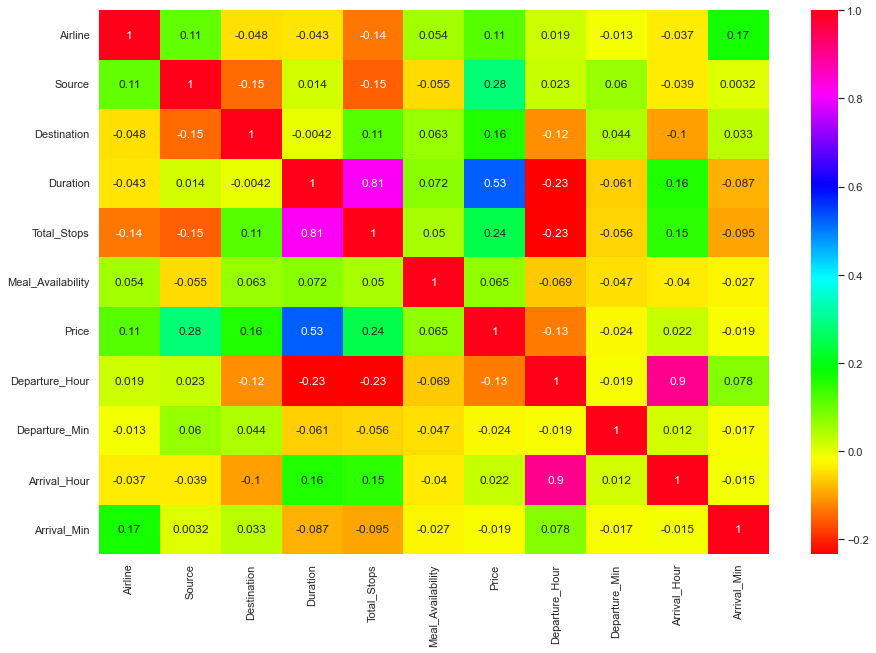

In [54]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='hsv',annot=True)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other

In [55]:
cor['Price'].sort_values(ascending=False)

Price                1.000000
Duration             0.526379
Source               0.280277
Total_Stops          0.244747
Destination          0.161086
Airline              0.114865
Meal_Availability    0.065281
Arrival_Hour         0.022268
Arrival_Min         -0.019205
Departure_Min       -0.023955
Departure_Hour      -0.132531
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

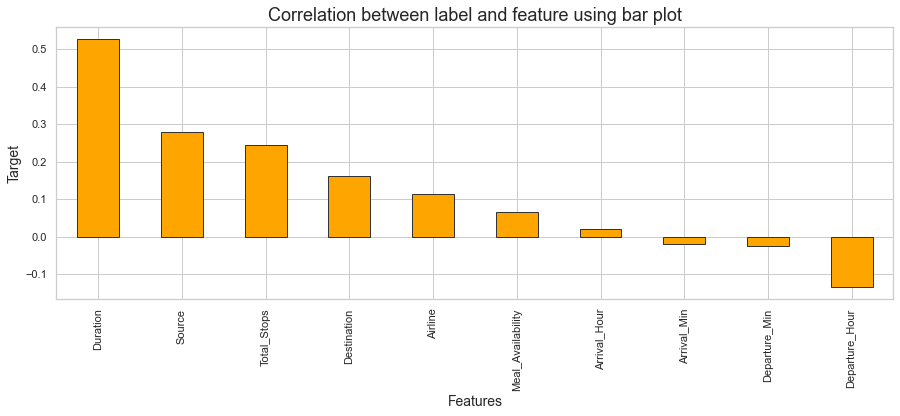

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='orange',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Arrival_Hour" has less correlation with the label compared to other features.

# Separating the independent and target variables into x and y

In [57]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [58]:
# Dimension of x and y
x.shape, y.shape

((546, 10), (546,))

# Scaling data with standard scaler

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Airline    Source  Destination  Duration  Total_Stops  Meal_Availability  \
0  0.409994  0.915836     0.539857  1.072454     1.694877           0.454638   
1  0.409994  0.915836     0.539857  1.353172     1.694877           0.454638   
2  0.409994  0.915836     0.539857  1.193716     1.694877           0.454638   
3 -0.145482  0.915836     0.539857  0.977291     1.694877           0.454638   
4 -0.145482  0.915836     0.539857  0.867736     1.694877           0.454638   

   Departure_Hour  Departure_Min  Arrival_Hour  Arrival_Min  
0       -1.032380      -0.373152     -0.899005     1.562440  
1       -1.211667      -1.500351     -0.899005     1.562440  
2       -1.211667      -1.500351     -0.899005    -1.349138  
3       -1.032380      -1.500351     -0.899005    -0.766822  
4        0.939781       0.190447      1.105979    -0.184507

# Modeling

Finding the Best Random State and Accuracy

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV

In [61]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.935306135069783  on Random_state  123


Here we are getting accuracy score of 93% with Random state 123

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Feature Importance

In [63]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                     
Duration                0.438
Destination             0.297
Source                  0.125
Airline                 0.030
Arrival_Hour            0.030
Departure_Min           0.029
Arrival_Min             0.023
Departure_Hour          0.020
Total_Stops             0.004
Meal_Availability       0.004

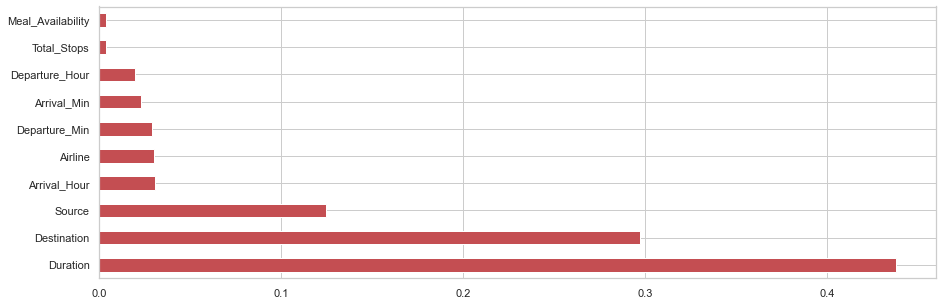

In [64]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="r")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Duration"contributing more for prediction which means this feature is important for the predictions

# Decision Tree Regressor

R2_Score: 91.19765027382219
Mean Absolute Error: 175.04268292682926
Mean Squared Error: 209420.21341463414
Root Mean Squared Error: 457.62453323071975

Cross Validation Score: 34.918428054415486

R2 Score - Cross Validation Score is 56.279222219406705


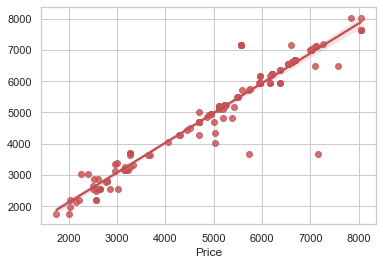

In [65]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="r")
plt.show()

# Random Forest Regressor

R2_Score: 92.58523307555144
Mean Absolute Error: 281.3143902439025
Mean Squared Error: 176407.67749999996
Root Mean Squared Error: 420.0091397815052

Cross Validation Score: 48.261592536734156

R2 Score - Cross Validation Score is 44.32364053881729


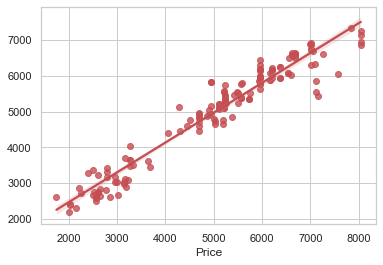

In [66]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="r")
plt.show()

# Extra Trees Regressor

R2_Score: 89.43219709296687
Mean Absolute Error: 279.29524390243904
Mean Squared Error: 251422.81424390242
Root Mean Squared Error: 501.42079558381147

Cross Validation Score: 59.10617405035337

R2 Score - Cross Validation Score is 30.326023042613507


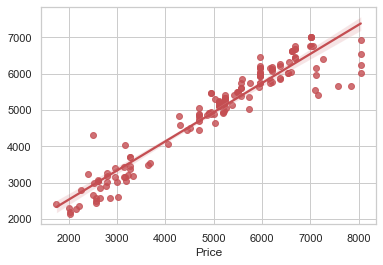

In [67]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="r")
plt.show()

# GradientBoosting Regressor

R2_Score: 89.81150855558472
Mean Absolute Error: 350.54671256016337
Mean Squared Error: 242398.46393709665
Root Mean Squared Error: 492.33978504392337

Cross Validation Score: 48.447865409818114

R2 Score - Cross Validation Score is 41.36364314576661


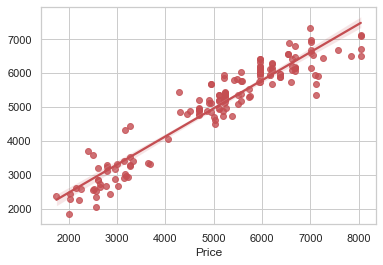

In [68]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="r")
plt.show()

# Extreme Gradient Boosting Regressor (XGB)

R2_Score: 89.45591433348054
Mean Absolute Error: 291.81413678425116
Mean Squared Error: 250858.5479145149
Root Mean Squared Error: 500.85781207296236

Cross Validation Score: 50.053944713046846

R2 Score - Cross Validation Score is 39.40196962043369


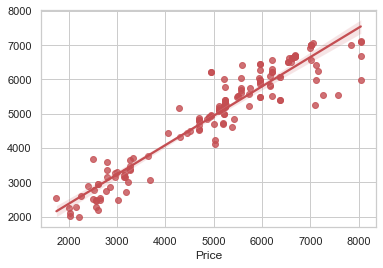

In [69]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="r")
plt.show()

# Bagging Regressor

R2_Score: 91.25336043057565
Mean Absolute Error: 301.19756097560975
Mean Squared Error: 208094.79085365855
Root Mean Squared Error: 456.17407955040426

Cross Validation Score: 45.706039005818624

R2 Score - Cross Validation Score is 45.54732142475703


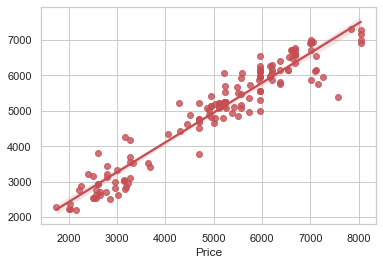

In [70]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="r")
plt.show()

# KNeighbors Regressor

R2_Score: 42.59717929792569
Mean Absolute Error: 886.6060975609757
Mean Squared Error: 1365693.4041463416
Root Mean Squared Error: 1168.6288564580038

Cross Validation Score: -3.0691431114332834

R2 Score - Cross Validation Score is 45.666322409358976


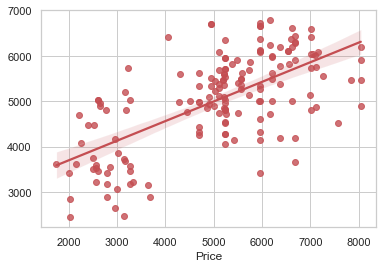

In [71]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="r")
plt.show()

All models have performed very well.From the difference between R2 score and Cross Validation score, it can be seen that the XGB Regressor has least difference and low evaluation metrics compared to other models. That is XGBoost as a regression gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that XGB Regressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

# Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

In [74]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [76]:
# Finding best parameters
GCV.best_params_

{'gamma': 0.30000000000000004,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200}

R2_Score: 90.35682885002355
Mean absolute error: 275.09498707841084
Mean squared error: 229424.53129487467
Root Mean Squared error: 478.9828089763501


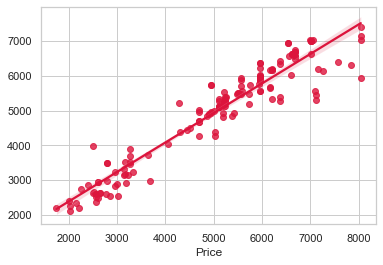

In [77]:
# Creating final model
Flight_price_model = xgb(gamma=0.1, learning_rate=0.15000000000000002, max_depth=10, n_estimators=200)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

We have successfully incorporated the hyper parameter tuning using best parameters of XGB Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 99.76% which is very good.
From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

# Saving the Final model

In [78]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

Loading the saved model and predicting Flight price

In [79]:
# Loading the saved model
Model=joblib.load("FlightPricePrediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([2357.5032, 2629.1167, 5953.897 , 5646.0874, 6011.0317, 5551.114 ,
       5320.5283, 5108.853 , 6582.9478, 5385.947 , 6690.059 , 6012.0815,
       6304.266 , 4694.048 , 6387.0576, 4905.2124, 5260.549 , 6616.998 ,
       7144.878 , 7042.5303, 5236.9307, 5938.599 , 4950.0034, 2590.9756,
       5955.12  , 5272.574 , 4696.3228, 5503.015 , 5260.549 , 5502.941 ,
       5328.6196, 4500.309 , 2753.041 , 6419.7153, 2254.204 , 3708.3586,
       6168.2427, 6371.0537, 7045.403 , 6330.154 , 5891.7627, 5272.574 ,
       5878.14  , 3148.1592, 2864.738 , 5918.5127, 3239.3289, 5402.789 ,
       6181.49  , 5262.373 , 5482.957 , 5288.8013, 4047.8245, 2935.329 ,
       5236.8237, 2192.4827, 4259.779 , 5954.026 , 2920.9644, 6371.0537,
       5678.7417, 6690.136 , 4852.859 , 4934.34  , 5284.1772, 3517.9827,
       5336.792 , 3496.4348, 5525.3003, 2547.4094, 3222.519 , 5293.6543,
       2874.4321, 4828.2754, 6616.8335, 5140.87  , 5864.0728, 2635.1182,
       3151.948 , 6959.9463, 5129.724 , 5004.931 , 

In [80]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T
Predicted_Flight_Ticket_Price

Predicted  Actual
0    2357.503174  2552.0
1    2629.116699  2640.0
2    5953.896973  5954.0
3    5646.087402  6164.0
4    6011.031738  5954.0
..           ...     ...
159  6570.388184  6690.0
160  4369.749023  4293.0
161  5241.107910  5241.0
162  6557.820312  6690.0
163  2099.149902  2019.0

[164 rows x 2 columns]

Using regression model, we have got the predicted price of the flight tickets. From the above output we can observe that predicted values are almost near to the actual values.

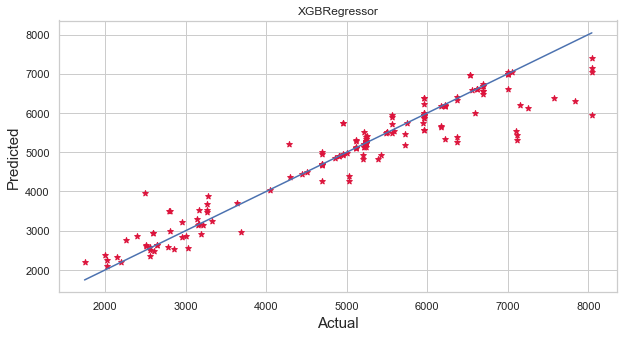

In [81]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [82]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("PredictedFlightTicketPrice.csv",index=False)

# Conclusion
In this project we have scraped the flight data from airline webpages. Then the comma separated value file is loaded into a data frame. Looking at the data set we understand that there are some features needs to be processed like converting the data types and get the actual value from the string entries from the time related columns. After the data is been processed I have done some EDA to understand the relation among features and the target variable. Features like flight duration, number of stops during the journey and the availability of meals are playing major role in predicting the prices of the flights

As we have seen, the prediction is showing a similar relationship with the actual price from the scrapped data set. This means the model predicted correctly and it could help airlines by predicting what prices they can maintain. It could also help customers to predict future flight prices and plan the journey accordingly because it is difficult for airlines to maintain prices since it changes dynamically due to different conditions. Hence by using Machine Learning techniques we can solve this problem.

The above research will help our client to study the latest flight price market and with the help of the model built he can easily predict the price ranges of the flight, and also will helps him to understand Based on what factors the fight price is decided.

